# MNIST Digit Recognition with My Handwritten Dataset

The aim of this work is to recognize handwritten digits using a pre-trained MNIST model. My handwritten digits are preprocessed and fed into the model to predict the digit. The predictions are then evaluated for accuracy.

#### Import necessary packages and modules

In [19]:
import mnist_data
from mnist import Mnist
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

#### Function to load custom handwritten digit images


In [20]:
def load_custom_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img = np.asarray(img, dtype=np.float32).reshape(1, 784)
    img = img / 255.0
    return img

#### Initialize Mnist class and load pretrained network

In [21]:
mnist = Mnist()
mnist.init_network()

#### List of my handwritten digit images

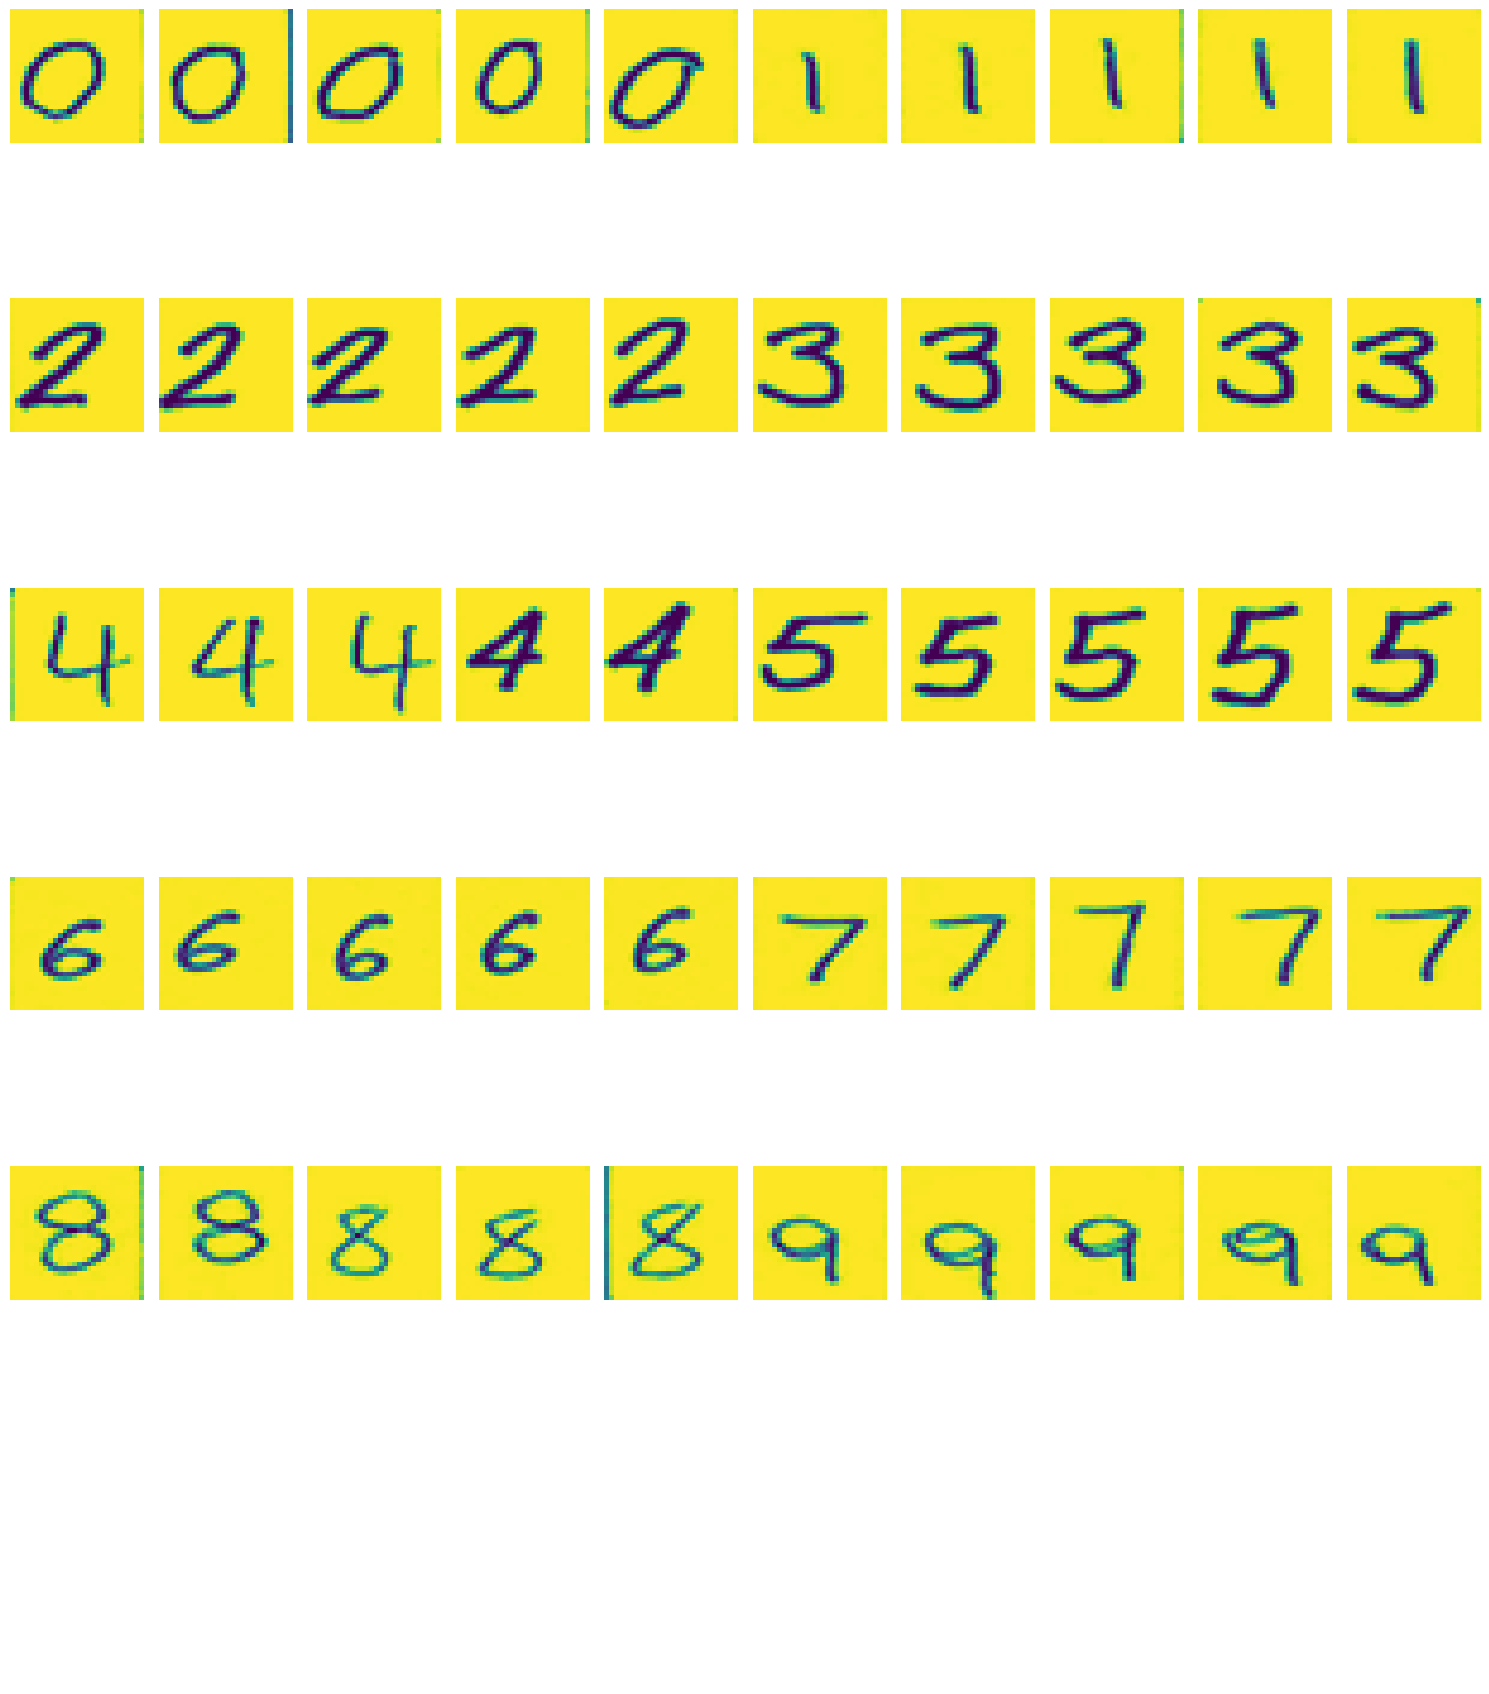

In [22]:
custom_images_dir = 'Custom MNIST Samples/'
all_images = []

for root, dirs, files in os.walk(custom_images_dir):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(root, file)
            image = Image.open(image_path)
            all_images.append(image)

num_images = len(all_images)
columns = 10
rows = (num_images // columns) + 1

fig, axes = plt.subplots(rows, columns, figsize=(15, 3 * rows))

for i, ax in enumerate(axes.flatten()):
    if i < num_images:
        ax.imshow(all_images[i])
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

#### Function to run inference on a given image

In [31]:
def test_custom_image(image_path, true_digit):
    #Loading my handwritten digit image, run inference, and display the result.
    """Parameters:
             image_path (str): Path to the image file.
             true_digit (int): True digit represented by the image.
    """
    img = load_custom_image(image_path)
    
    if img is not None:
        prediction = mnist.predict(img)
        predicted_digit = np.argmax(prediction)
        
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_digit}, Predicted: {predicted_digit}')
        plt.show()
        
        if predicted_digit == true_digit:
            print(f"Success: Image {image_path} is for digit {true_digit} and is recognized as {predicted_digit}.")
        else:
            print(f"Fail: Image {image_path} is for digit {true_digit} but the inference result is {predicted_digit}.")
    else:
        print('Image could not be loaded.')

## Prediction with my Hand writing

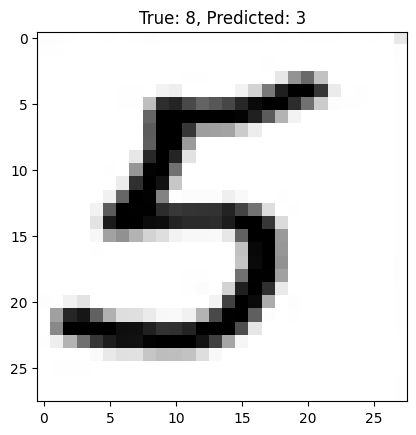

Fail: Image Custom MNIST Samples/Digit 5/5_4.png is for digit 8 but the inference result is 3.


In [44]:
test_custom_image('Custom MNIST Samples/Digit 5/5_4.png', 8)